Loading pipeline components...: 100%|██████████| 6/6 [00:01<00:00,  5.12it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .
100%|██████████| 4/4 [00:01<00:00,  3.74it/s]


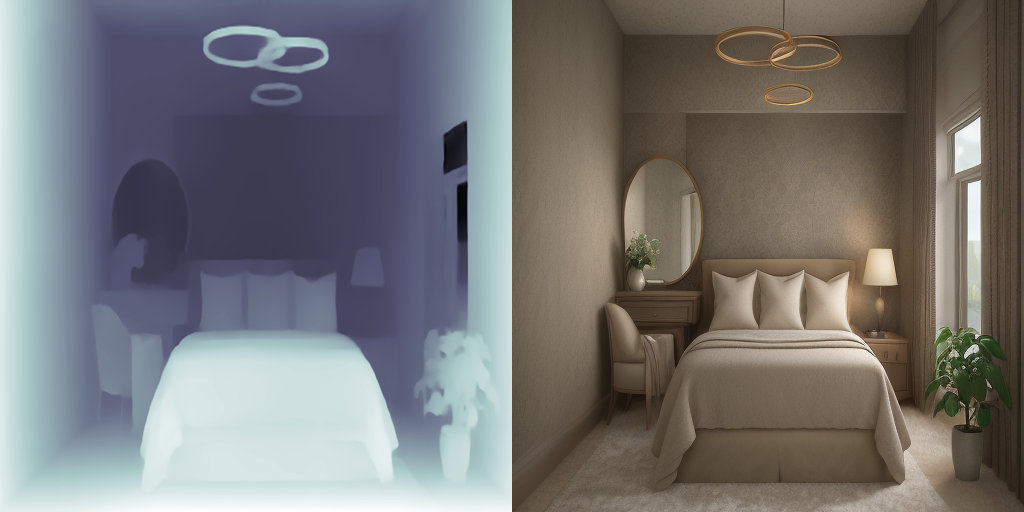

In [23]:
import torch
import cv2
import numpy as np
from PIL import Image

from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, LCMScheduler
from diffusers.utils import load_image, make_image_grid
import time

image = load_image(
    "/mnt/sagarika/_0SD/Images/2_nocrop.png"
).resize((512, 512))

controlnet = ControlNetModel.from_pretrained("lllyasviel/control_v11f1p_sd15_depth", torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "SimianLuo/LCM_Dreamshaper_v7",
    controlnet=controlnet,
    torch_dtype=torch.float16,
    safety_checker=None,
).to("cuda")

pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config)

generator = torch.manual_seed(12345)

start_time = time.time()
output = pipe(
    "luxury bedroom interior",
    image=image,
    num_inference_steps=4,
    generator=generator,
).images[0]

latency = time.time() - start_time
output.save(f"./gen_lcm/2_nocrop.png")

make_image_grid([image, output], rows=1, cols=2)

In [22]:
latency

0.7242844104766846